# I. Introduction

=================================================

Milestone 2

Nama  : Pujo Prasetyo Aji

Batch : RMT-043

=================================================

**Problem Background :** \
Obesitas adalah sebuah penyakit yang diakibatkan oleh kelebihan lemak dalam tubuh. Obesistas dapat dipengaruhi oleh banyak faktor diantaranya faktor genetic, factor hormonal dan gaya hidup seperti pola makan, jenis makanan, kuantitas mengkonsumsi makanan dan juga aktifitas fisik. Hampir 70% kejadian obesitas disebabkan oleh pengaruh gaya hidup dan lingkungan. Perilaku masyarakat yang semakin konsumtif berdampak pada transisi pola makan tinggi kalori, tinggi lemak dan tinggi garam, misalnya seperti junkfood, hamburger, sosis, mie instant, gorengan dan minuman bersoda. Hal tersebut menimbulkan permasalahan dalam tubuh seperti lonjakan gula darah, penumpukan lemak, dan kurangnya gizi seimbang.

Obesitas dapat meningkatkan risiko penyakit jantung, diabetes, hipertensi, stroke, kanker, dan masalah pencernaan seperti GERD atau batu empedu. Oleh sebab itu perlu dilakukan screening terhadap tingkat obesitas secara teratur untuk memantau pola hidup dan kadar lemak dalam tubuh agar tingkat obesitas menjadi lebih terkontrol.


**Objective :** \
Project ini bertujuan untuk membuat model machine learning untuk mendiagnosa level obesitas yang dialami oleh seseorang menggunakan metode klasifikasi. \
Berdasarkan hasil prediksi yang ditemukan, memberikan rekomendasi kepada user mengenai berat badan / tinggi badan ideal serta pola hidup yang sesuai untuk mengurangi level obesitas. \
Kemudian dari hasil analisis yang didapatkan, mengambil insight mengenai potensi bisnis yang dapat dilakukan.

**Method :** \
Terdapat beberapa algoritma machine learning yang digunakan pada project ini untuk mendapatkan hasil prediksi yang paling baik, algoritma yang digunakan antara lain descission tree, kkn, svm, random forest dan catboost \
Karena jenis model yang digunakan adalah klasifikasi matrics evaluasi yang digunakan adalah accuracy score dan roc auc

**Dataset :** \
Dataset yang digunakan untuk project ini diambil dari UC Irvine Machine Learning Repository dengan judul “Estimation of Obesity Levels Based On Eating Habits and Physical Condition”. 
Dataset berisi data Obesitas Level berdasarkan pola makan dan kondisi fisik responden yang diambil dari populasi penduduk Colombia, Peru, dan Mexico pada tahun 2017.
Dataset terdiri dari 17 kolom dan 2111 baris data.

Hasil model deployment dapat diakses pada link berikut: \
https://huggingface.co/spaces/prasetyoaji/Milestone2

Dataset dapat diakses pada link berikut:
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition 

=================================================


# II. Import Library

Bagian ini berisi baris kode untuk memanggil library yang digunakan dalam proses pengolahan data dan machine learning

In [76]:
#Import library yang dibutuhkan untuk pengolahan data
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import uniform, randint
import pickle
import json

#Import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

#Import library untuk data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer

#Import library algoritma machine learning
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

# III. Data Loading

Pada tahap ini data dimuat dan dilakukan eksplorasi dasar untuk mengetahui struktur dan karakteristik dataset sebelum dilakukan analisis dan pengolahan data lebih lanjut

In [77]:
#Memua dataset
data = pd.read_csv('ObesityDataset.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Setelah dataset berhasil dimuat, selanjutnya dilakukan penamaan ulang terhadap beberapa nama kolom yang ada pada dataset agar lebih mudah dipahami.

In [78]:
#Merubah nama kolom dataset
data = data.rename(columns={'family_history_with_overweight': 'genetic_overweight', 'FAVC': 'Eating_High_Calories',
                            'FCVC': 'Eating_Vegi_Freq', 'NCP': 'Daily_Meals', 'CAEC' : 'Eating_Snack_Freq',
                            'CH2O' : 'Daily_Water', 'SCC' : 'Calories_Monitoring', 'FAF' : 'Physical_Activity_Freq',
                            'TUE' : 'Entertain_Activity_Freq', 'CALC':'Alcohol_Freq', 'NObeyesdad': 'Obesity_Level'})

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   2111 non-null   object 
 1   Age                      2111 non-null   float64
 2   Height                   2111 non-null   float64
 3   Weight                   2111 non-null   float64
 4   genetic_overweight       2111 non-null   object 
 5   Eating_High_Calories     2111 non-null   object 
 6   Eating_Vegi_Freq         2111 non-null   float64
 7   Daily_Meals              2111 non-null   float64
 8   Eating_Snack_Freq        2111 non-null   object 
 9   SMOKE                    2111 non-null   object 
 10  Daily_Water              2111 non-null   float64
 11  Calories_Monitoring      2111 non-null   object 
 12  Physical_Activity_Freq   2111 non-null   float64
 13  Entertain_Activity_Freq  2111 non-null   float64
 14  Alcohol_Freq            

Berdasarkan informasi dasar yang ditampilkan oleh dataset, dataset memiliki 17 kolom dan 2111 baris data. Jika dilihat berdasarkan tipe datanya terdapat 8 kolom numerikal dan 9 kolom kategorikal. Namun jika diteliti lebih lanjut terdapat sebuah kolom yang seharusnya merupakan kolom kategorikal yaitu 'eating_vegi_freq'. 

Berdarkan deskripsi kolom yang terdapat pada penjelasan mengenai dataset tersebut, kolom tersebut menjelaskan seberapa sering sampel mengkonsumsi sayur-sayuran setiap harinya. Paper yang menjelaskan tentang dataset dapat diakses [disini](https://www.sciencedirect.com/science/article/pii/S2352340919306985)

Sehingga seharusnya data terdiri dari 7 kolom numerikal dan 10 kolom kategorikal. 
Sebelum dilakukan proses eksplorasi data lebih lanjut, dilakukan penanganan terhadap kolom 'Eating_Vegi_Freq' agar tidak terjadi kekeliruan saat pengolahan data numerik dan kategorikal. 

Berdasarkan analisis yang dilakukan terhadap kolom tersebut, kolom tersebut merupakan kolom kategorikal yang sudah dilakukan proses encoding dan scaling sehingga data berubah menjadi angka. Karena kita tahu representasi dari nilai-nilai tersebut maka dilakukan reverse encoding untuk merubah data menjadi kolom kategorikal kembali.

In [80]:
#Membuat list untuk menampung data
vegi = []

for i in data['Eating_Vegi_Freq']:
    '''
    Perulangan untuk menentukan value
    jika i = 1 maka nilainya menjadi never
    jika i = 2 maka nilainya menjadi sometimes
    jika i = 3 maka nilainya menjadi always
    '''
    if round(i) == 1:
        vegi.append('Never')
    elif round(i) == 2:
        vegi.append('Sometimes')
    elif round(i) == 3:
        vegi.append('Always')

data['Eating_Vegi_Freq'] = vegi

In [81]:
data.describe()

,Age,Height,Weight,Daily_Meals,Daily_Water,Physical_Activity_Freq,Entertain_Activity_Freq
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,4.000000,3.000000,3.000000,2.000000


Berdasarkan deskripsi umum dari dataset yang digunakan terdapat beberapa poin epnting yang dapat dilihat yaitu:
1. Umur sampel yang digunakan dalam dataset berkisar antara 14-61 tahun dengan umur rata-rata sekitar 24 tahun
2. Tinggi badan (tb) maksimal data sampel yaitu 1,98m dan tinggi minimal 1,4m, rata-rata tinggi badan sampel sekitar 1,7m
3. Berat badan (bb) minimal pada data yaitu 39kg dan bb maksimal berada pada angka 173kg, rata-rata berat badan sampel sekitar 86kg
4. Sebagian besar sampel suka mengkonsumsi sayuran, hal tersebut dapat dilihat dari nilai means dan median yang tinggi.
5. Jika dilihat dari nilai rata-rata 'daily_meals' sebagian besar sampel makan sebanyak 2-3 kali sehari
6. Rata-rata konsumsi air harian data sampel berada di angka 2 liter perhari
7. Sebagian besar sampel jarang melakukan aktifitas fisik, hal tersebut dapat diliat dari nilai rata-rata 'Physical_Activity_Freq' yang rendah.
8. Sebagian besar data sampel juga kurang menyukai entertaiment activity seperti bermain handphone, menonton tv, dll. Hal tersebut dapat dilihat berdasarkan nilai rata-rata 'Entertain_Activity_Freq' yang rendah.

# IV. Exploratory Data Analysis (EDA)

Pada tahap ini dilakukan proses eksplorasi data mendapatkan informasi atau insight yang dapat diambil dari dataset yang digunakan.

## 4.1 Pengaruh Makanan Tinggi Kalori Terhadap Obesity Level

Pada bagian ini dilakukan analis terhadap pengaruh makanan tinggi kalori terhadap level obesitas. Karena kedua data yang dibandingkan merupakan data kategorikal maka pengujian menggunakan chi-square test.
Hipotesis yang digunakan adalah : \
H0 : Tidak terdapat hubungan antara makanan tinggi kalori dengan obesity level \
H1 : Terdapat hubungan antara makanan tinggi kalori dengan obesity level

In [82]:
#Membuat Contingency Table
table_calories_obesity = pd.crosstab(data['Obesity_Level'],data['Eating_High_Calories'])
table_calories_obesity

Eating_High_Calories,no,yes
Obesity_Level,,
Insufficient_Weight,51,221
Normal_Weight,79,208
Obesity_Type_I,11,340
Obesity_Type_II,7,290
Obesity_Type_III,1,323
Overweight_Level_I,22,268
Overweight_Level_II,74,216


In [83]:
#Menguji hubungan dengan chi-square test
res3 = stats.chi2_contingency(table_calories_obesity)
print(res3.pvalue)

1.4822362082358762e-47


Berdasarkan hasil pengujian menggunakan chi-square test. Nilai pvalue yang dihasilkan kurang dari 0.05 sehingga H0 ditolak. Terdapat hubungan antara makanan tinggi kalori dengan obesity level. Hal tersebut berarti jika seseorang sering mengkonsumsi makanan tinggi kalori maka akan berdampak pada obesity level yang didapatkan.

Untuk melihat bagaimana perilaku konsumsi makanan tinggi kalori mempengaruhi obesitas level digambarkan dengan pieplot dibawah

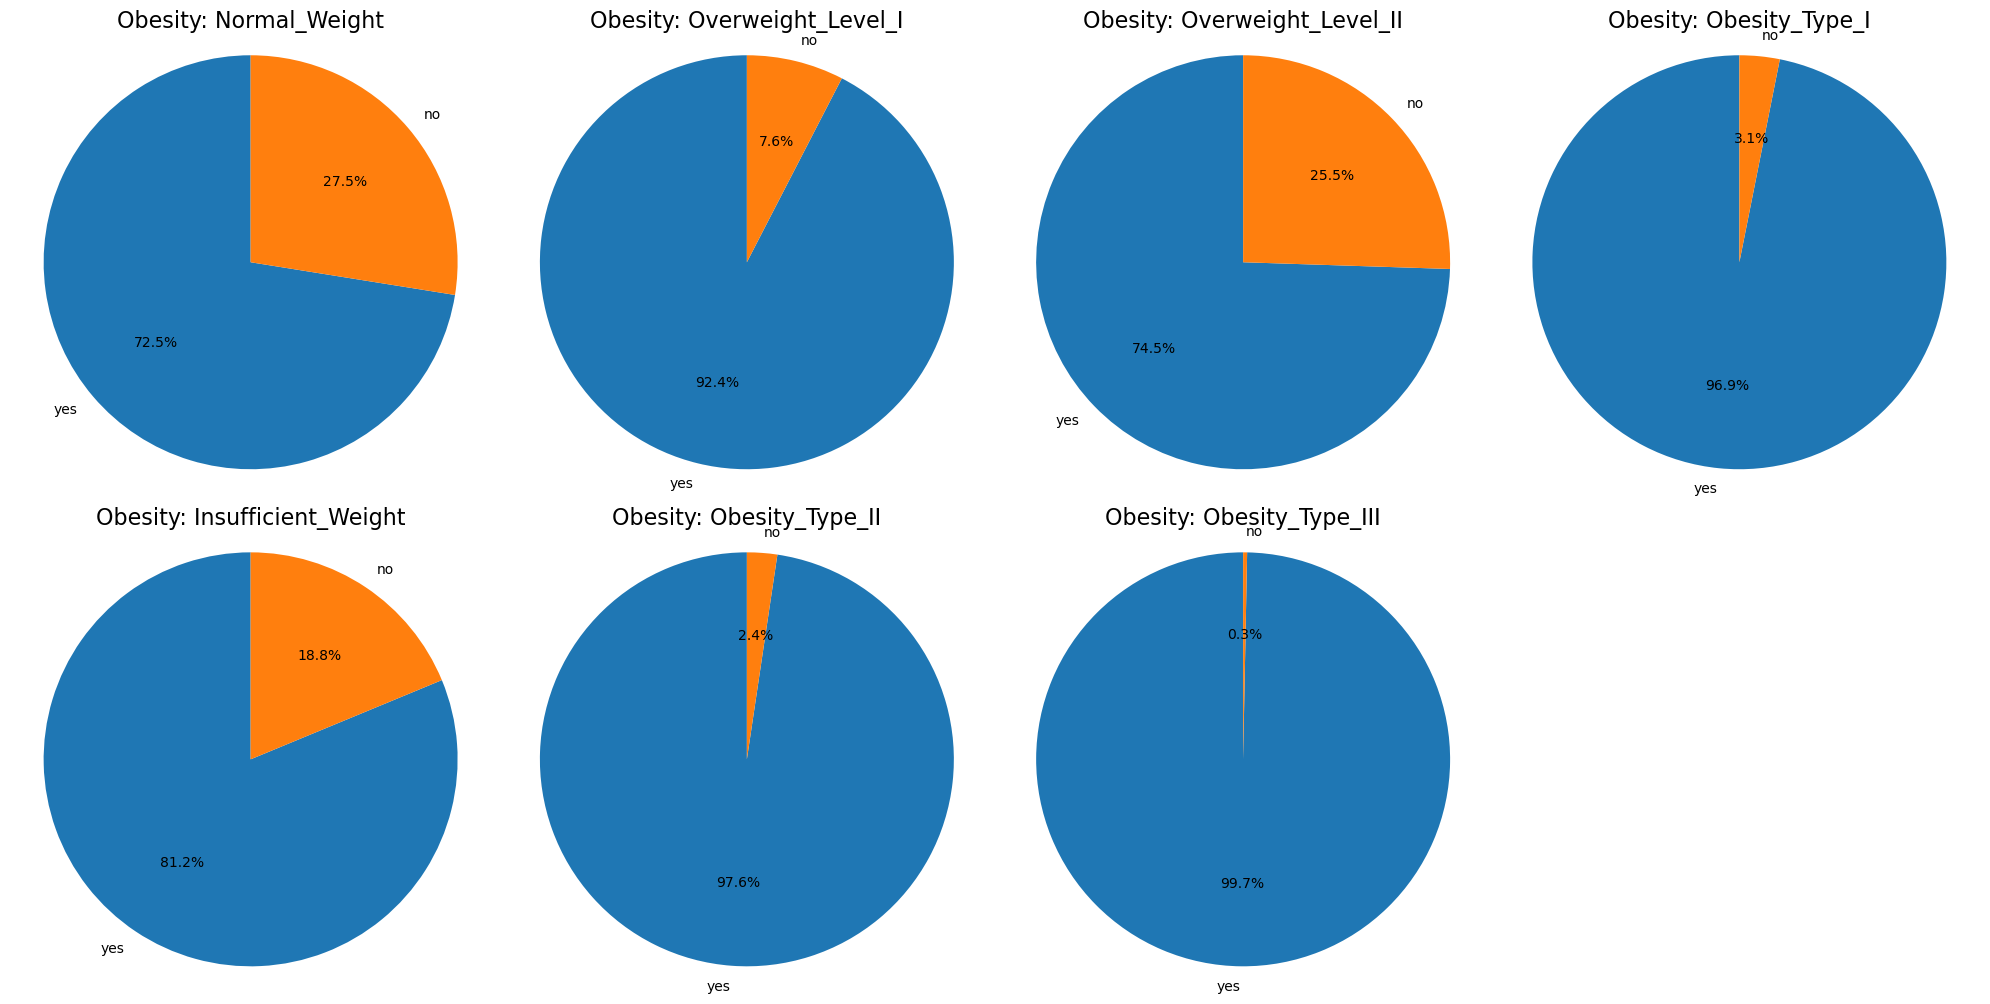

In [84]:
#Menampilkan pieplot perilaku konsumsi makanan tinggi kalori
obesity_levels = data['Obesity_Level'].unique()
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
axs = axs.flatten()

for i, level in enumerate(obesity_levels):
    '''
    Perulangan untuk menampilkan jumlah konsumsi makanan tinggi kalori berdasarkan obesitas level
    '''
    subset = data[data['Obesity_Level'] == level]
    cal_counts = subset['Eating_High_Calories'].value_counts()
    axs[i].pie(cal_counts, labels=cal_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Obesity: {level}', fontsize=16 )
    axs[i].axis('equal')

# Menghilangkan subplot yang tidak terpakai
for j in range(len(obesity_levels), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


Berdasarkan visualisasi yang digambarkan menggunakan pieplot. Orang yang dengan berat badan normal atau kurang cenderung lebih sedikit yang mengkonsumsi makanan tinggi kalori. Sedangkan orang dengan obesitas level yang tinggi cenderung suka mengkonsumsi makanan tinggi kalori.

## 4.2 Pengaruh Rokok dan Alkohol terhadap Obesity Level

Pada bagian ini dilakukan analis terhadap pengaruh makanan rokok dan alkohol terhadap level obesitas. Pengujian dilakukan menggunakan chi-square test karena seluruh data yang dibandingkan merupakan data kategorikal. \
Hipotesis yang digunakan adalah : \
H0 : Tidak terdapat hubungan antara rokok atau alkohol dengan obesity level \
H1 : Terdapat hubungan antara rokok atau alkohol dengan obesity level

In [85]:
#Contingency Table
table_smoke_obesity = pd.crosstab(data['Obesity_Level'],data['SMOKE'])
table_alcohol_obesity = pd.crosstab(data['Obesity_Level'],data['Alcohol_Freq'])

combined = pd.concat([table_smoke_obesity, table_alcohol_obesity], axis=1, keys=['SMOKE', 'Alcohol_Freq'])
display(combined)

SMOKE     Alcohol_Freq                          
                       no yes       Always Frequently Sometimes   no
Obesity_Level                                                       
Insufficient_Weight   271   1            0          1       154  117
Normal_Weight         274  13            1         18       161  107
Obesity_Type_I        345   6            0         14       172  165
Obesity_Type_II       282  15            0          2       224   71
Obesity_Type_III      323   1            0          0       323    1
Overweight_Level_I    287   3            0         16       224   50
Overweight_Level_II   285   5            0         19       143  128

In [86]:
#Menghitung p-value
res1 = stats.chi2_contingency(table_smoke_obesity)
res2 = stats.chi2_contingency(table_alcohol_obesity)

pval = pd.DataFrame({
    'variabel' :['obesity vs smoke', 'obesity vs alcohol'],
    'val': [res1.pvalue, res2.pvalue]
})
pval

,variabel,val
0,obesity vs smoke,1.535424e-05
1,obesity vs alcohol,5.287158e-61


Berdasarkan hasil pengujian yang dilakukan kedua variabel yang diuji mendapatkan nilai pvalue dibawah 0.05, hal tersebut berarti H0 ditolak. Terdapat hubungan antara rokok atau alkohol terhadap obesity level. \
Untuk melihat hubungan yang terjadi antara variabel tersebut dibuat visualisasi menggunakan heatmap.

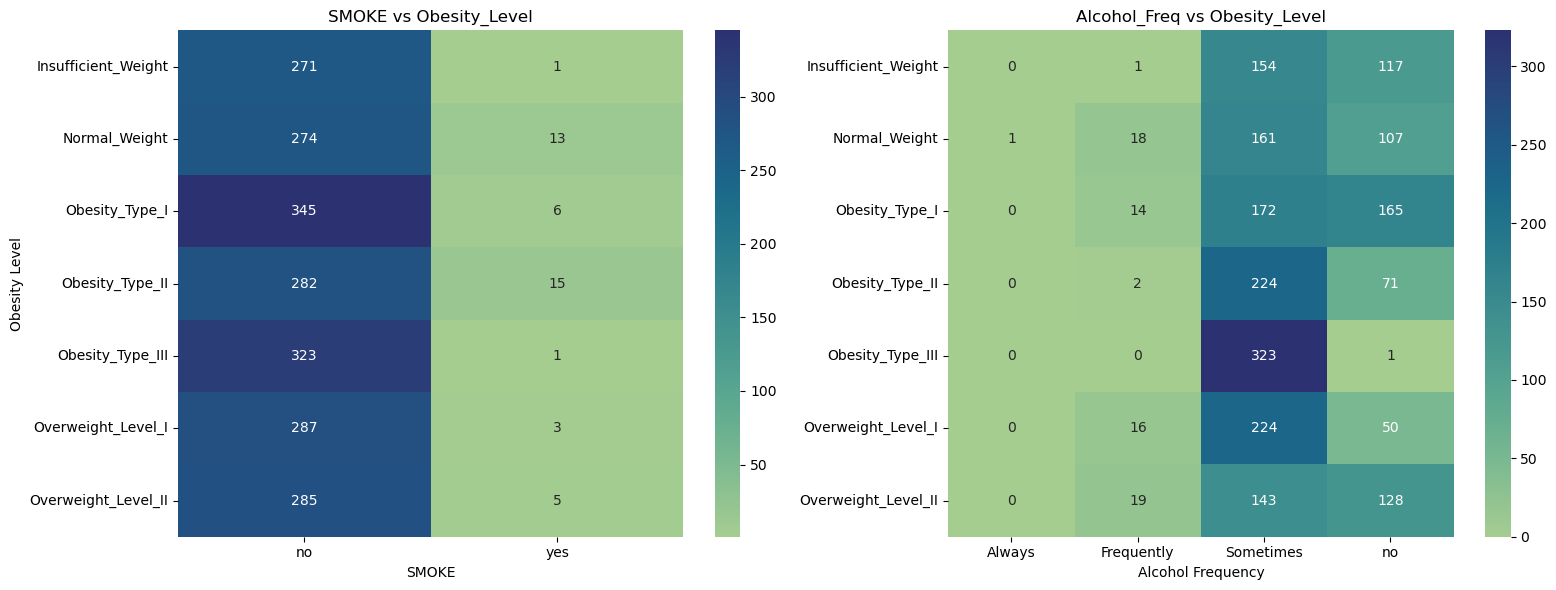

In [87]:
# Ukuran canvas
plt.figure(figsize=(16, 6))

# Heatmap 1: SMOKE vs Obesity_Level
plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, subplot ke-1
sns.heatmap(table_smoke_obesity, annot=True, cmap='crest', fmt='d')
plt.title("SMOKE vs Obesity_Level")
plt.xlabel("SMOKE")
plt.ylabel("Obesity Level")

# Heatmap 2: Alcohol_Freq vs Obesity_Level
plt.subplot(1, 2, 2)  # subplot ke-2
sns.heatmap(table_alcohol_obesity, annot=True, cmap='crest', fmt='d')
plt.title("Alcohol_Freq vs Obesity_Level")
plt.xlabel("Alcohol Frequency")
plt.ylabel("")

# Rapiin layout
plt.tight_layout()
plt.show()


Dari visualisasi yang ditampilkan terdapat hubungan yang nyata antara rokok dan obesity level, namun hubungan tersebut negatif. Jika kita lihat orang yang jarang merokok lebih banyak yang mengalami obesitas dibandingkan orang yang merokok. 

Sedangkan pada tabel hubungan antara alkohol dan obesitas level, orang yang sering mengkonsumsi alkohol dan jarang mengkonsumsi alkohol mengalami obesitas level yang bervariasi. Orang yang mengkonsumsi alkohol dengan frekuensi rendah-sedang cenderung lebih banyak yang terdeteksi memiliki obesitas.

Berdasarkan hasil pengujian yang dilakukan pada tahap ini dapat disimpulkan bahwa rokok dan alkohol memiliki pengaruh terhadap obesitas level, namun terdapat faktor-faktor lain yang mungkin lebih berpengaruh terhadap obesitas level

## 4.3 Hubungan Physical Activity Terhadap Obesity Level

Pada bagian ini analisis untuk mengetahui apakah terdapat hubungan antara physical activity dengan obesity level. Karena data yang diuji merupakan gabungan dari data numerik dan kategorikal maka metode pengujian yang digunakan adalah kendall's tau test. Hipotesis yang digunakan adalah : \
H0 : Tidak terdapat hubungan antara physical activity dengan obesity level \
H1 : Terdapat hubungan antara physical activity dengan obesity level

In [88]:
coef, pval = stats.kendalltau(data['Physical_Activity_Freq'], data['Obesity_Level'])
print('coef : ', coef)
print('p-value : ', pval)

coef :  -0.09116284065187868
p-value :  1.0426892864648804e-08


Hasil pengujian yang dilakukan mendapatkan nilai pvalue kurang dari 0.05 sehingga H0 ditolak, terdapat hubungan antara physical activity dengan obesity level. Nilai koefisien yang didapatkan adalah -0.09 yang menandakan hubungan negatif, dalam hal ini berarti semakin rendah nilai physical activity maka semakin tinggi obesity level atau pun sebaliknya.

Hubungan antara physical activity dengan obesity level dapat dilihat menggunakan scatter plot dibawah.

C:\Users\KAISAR\AppData\Local\Temp\ipykernel_12224\1628989263.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='Physical_Activity_Freq', y='Obesity_Level', palette='bright')


<Axes: xlabel='Physical_Activity_Freq', ylabel='Obesity_Level'>

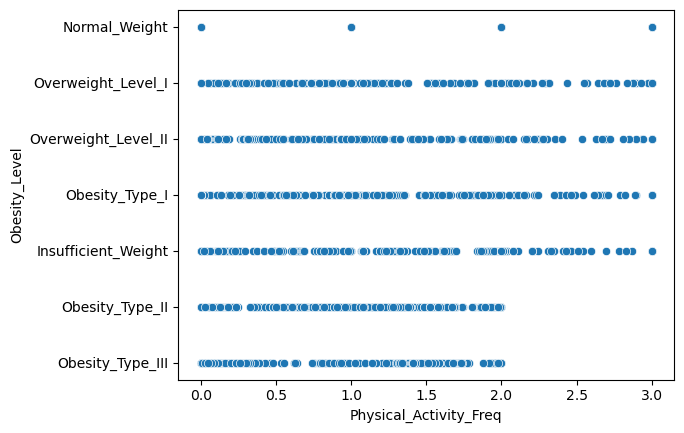

In [89]:
sns.scatterplot(data=data, x='Physical_Activity_Freq', y='Obesity_Level', palette='bright')

Berdasarkan scatter plot diatas dapat dilihat bahwa semakin tinggi level obesitas seseorang maka semakin rendah physical activity yang dilakukan.

## 4.4 Distribusi Tinggi Badan dan Berat Badan

Pada bagian ini dilakukan analisis terhadap persebaran data tinggi badan (tb) dan berat badan (bb) seseorang berdasarkan obesity level untuk melihat rentang tb/bb pada obesity level tertentu.

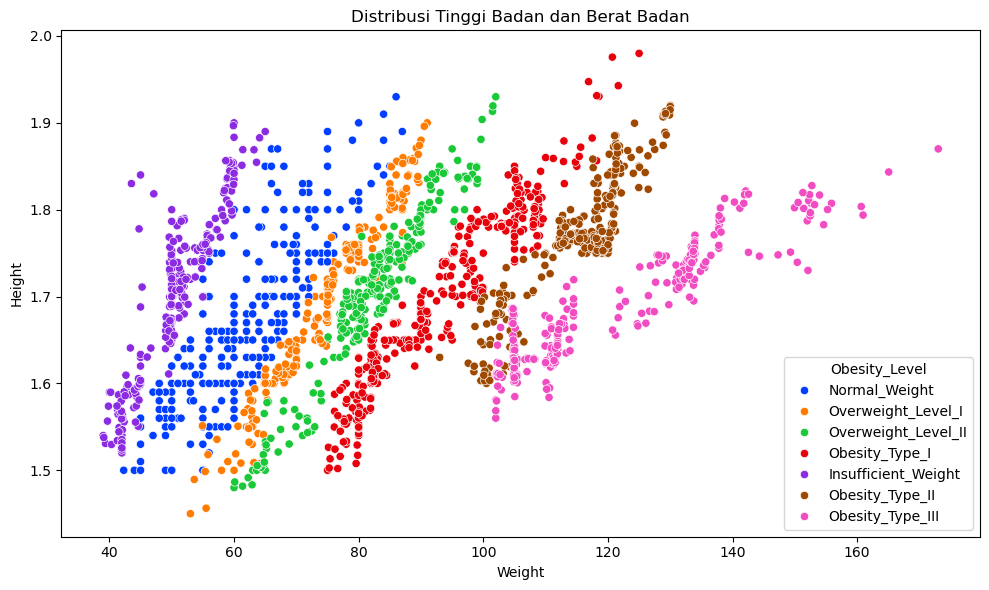

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Weight', y='Height', hue='Obesity_Level', palette='bright')
plt.title('Distribusi Tinggi Badan dan Berat Badan')
plt.tight_layout()
plt.show()

Dari visualisasi data yang ditampilkan poin yang dapat diambil yaitu:
1. Orang dengan berat badan yang kurang (ungu) cenderung memiliki berat badan dibawah 60kg dengan tinggi badan 1,5m - 1.9m
2. Orang dengan berat badan normal (biru) memiliki rentang berat badan yang bervariasi antara 40-80 kg, tinggi badan orang normal berkisar antara 1,5-1,9m. 
3. Orang dengan overweight level 1 (orange) memiliki rentang bb dari 50 - 90 kg dan tb 1,4-1,9m
4. Orang dengan overweight level 2 (hijau) memiliki rentang bb dari 60 - 100 kg dan tb 1,5-1,9m
5. Orang dengan obesity level 1 (merah)  memiliki rentang bb dari 80 - 120 kg dan tb 1,5-2m
6. Orang dengan obesity level 2 (coklat) memiliki rentang bb dari 100 - 130 kg dan tb 1,6-1,9m
7. Orang dengan obesity level 3 (pink) memiliki rentang bb dari 100 hingga 180 kg atau lebih dan tb 1,55-1,9m

Berdasarkan data tersebut dapat ditarik kesimpulan bahwa berat badan sangat berpengaruh terhadap obesity level, semakin tinggi nilai berat badan seseorang maka semakin tinggi obesitas level oran tersebut.

## 4.5 Jumlah Sampel di Setiap Obesity Level

Pada bagian ini dibuat visualisasi data untuk melihat distribusi jumlah data yang ada di setiap level obesitas

C:\Users\KAISAR\AppData\Local\Temp\ipykernel_12224\436324145.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Obesity_Level', palette='bright')


<Axes: xlabel='count', ylabel='Obesity_Level'>

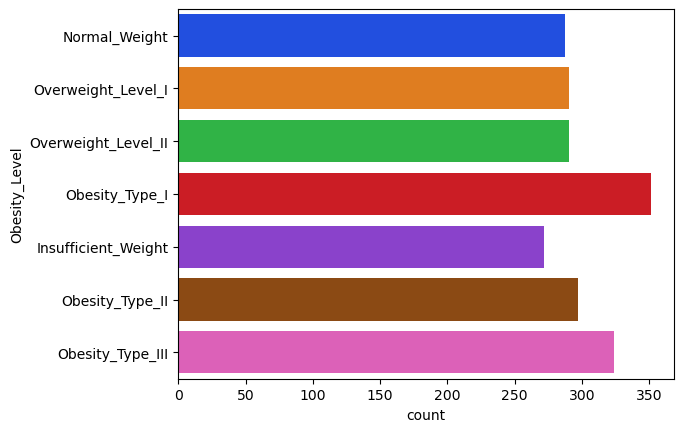

In [91]:
sns.countplot(data=data, y='Obesity_Level', palette='bright')

Berdasarkan visualisasi data yang dihasilkan Obesity Level tipe 1 merupakan kelas obesity level dengan jumlah sampel paling banyak dalam dataset, terdapat sekitar 350 sampel yang memiliki Obesitas tipe 1.
Kemudian Obesitas tipe 3 merupakan jumlah sampel terbanyak nomor 2 dengan jumlah sekitar 330, dan disusul Obesitas tipe 2 dengan jumlah 300 sampel.
Jumlah data sampel dengan berat badan kurang (Insufficient_weight) memiliki jumlah data paling sedikit dengan jumlah sekitar 270.

Jika dilihat dari distribusi data keseluruhan jumlah data yang ada disetiap kelas data tidak memiliki perbedaan jumlah yang signifikan, maka dapat disimpulkan bahwa data cukup balance sehingga tidak perlu dilakukan balancing data dalam proses feature engineering nantinya.

## 4.6 Jumlah Konsumsi Air Harian Berdasarkan Obesity Level

Pada bagian ini dilakukan analisis mengenai jumlah konsumsi air harian berdasarkan level obesitas seseorang

C:\Users\KAISAR\AppData\Local\Temp\ipykernel_12224\704317557.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Daily_Water', y='Obesity_Level', palette='bright')


<Axes: xlabel='Daily_Water', ylabel='Obesity_Level'>

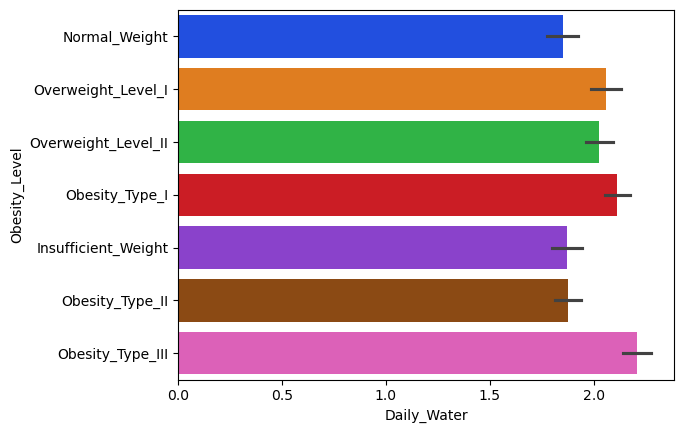

In [92]:
sns.barplot(data=data, x='Daily_Water', y='Obesity_Level', palette='bright')

Berdasarkan visualisasi data yang ditampilkan, rata-rata konsumsi air harian dari seluruh data sekitar 1,5 hingga 2 liter perhari. Orang dengan kelebihan berat badan atau obesitas cenderung mengkonsumsi air lebih banyak dibandingkan orang dengan berat badan normal. Jumlah konsumsi air harian tertinggi dimiliki oleh kelas obesity tipe 3 dengan jumlah konsumsi air harian lebih dari 2 liter per hari.

## 4.7 Frekuensi Konsumsi Sayur-sayuran Berdasarkan Obesity Level

Pada bagian ini dilakukan analisis mengenai pola konsumsi sayuran berdasarkan level obesitas seseorang

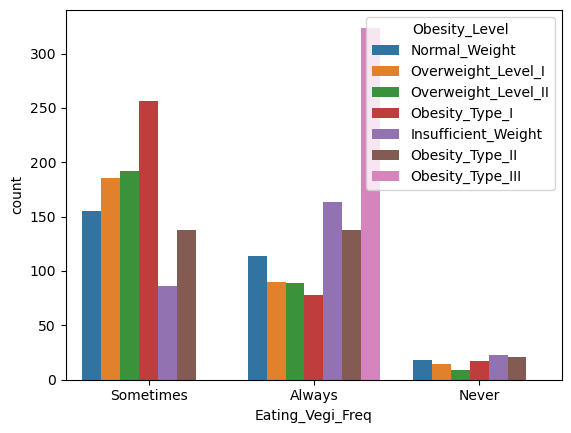

In [93]:
sns.countplot(data=data, x='Eating_Vegi_Freq', hue='Obesity_Level')
plt.show()

Berdasarkan visualisasi data yang ditampilkan, sebagian besar data sampel sering mengkonsumsi sayuran setiap harinya. Orang dengan obesitas malah lebih cenderung mengkonsumsi sayuran setiap kali mereka makan. Bahkan frekuensi konsumsi sayuran pada penderita obesity tipe 3 sangat besar dibandingkan data lainnya, hal tersebut kemungkinan terjadi karena mereka sering mengkonsumsi sayuran sebagai camilan atau snack setiap harinya.

## 4.8 Mode Transportasi yang Sering digunakan

Bagian ini dilakukan analisis terhadap moda transportasi yang sering digunakan berdasarkan obesity level

<Axes: xlabel='MTRANS', ylabel='count'>

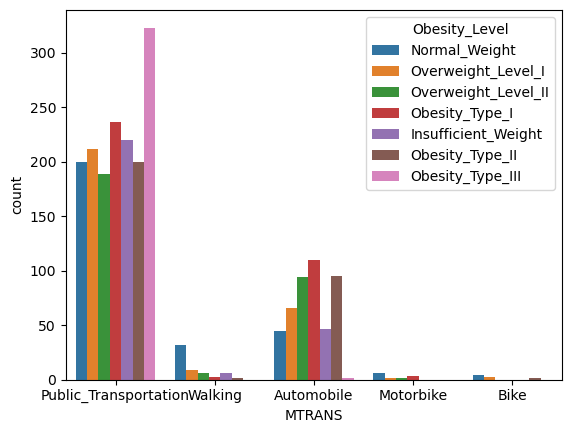

In [135]:
sns.countplot(data=data, x='MTRANS', hue='Obesity_Level')

Public transportation merupakan moda transportasi yang paling banyak digunakan oleh seluruh orang, disusul dengan mobil dan berjalan kaki. Transportasi dengan motor dan sepeda merupakan moda transportasi yang paling sedikit digunakan.

Jika dilihat berdasarkan obesity level orang dengan obesitas paling banyak menggunakan moda transportasi publik. Hampir seluruh orang dengan obesitas tipe 3 memilih transportasi publik sebagai moda transportasi sehari-hari.

Kemudian pada moda transportasi dengan jalan kaki, orang berat badan normal jauh lebih banyak yang berpergian dengan jalan kaki dibandingkan orang dengan obesitas.

Pada moda transportasi mobil, orang dengan obesitas lebih banyak yang menggunakan kendaraan mobil jika dibandingkan orang dengan berat badan normal atau kurang.

Dari seluruh hasil analisis data berdasarkan moda transportasi yang digunakan, dapat disimpulkan bahwa orang dengan obesitas lebih cenderung menggunakan kendaraan untuk berpergian dan menghindari jalan kaki

# V. Feature Engineering

Feature Engineering merupakan tahapan dimana data diolah agar menjadi feature yang akan digunakan sebagai data latih dan data test untuk model machine learning.

## 5.1 Cardinality Handling

Cardinality handling dilakukan untuk mencari nilai unique terutama pada kolom kategorikal. Hal tersebut dikarenakan jika terlalu banyak data unique yang ada dalam dataset akan berdampak pada performa machine learning.

In [95]:
#Mengecek cardinality atau banyaknya nilai unik dalam data
pd.set_option('display.max_colwidth', None)
cat_cols = list(data.select_dtypes(include='object').columns)

#Mengecek cardinality dan menyimpan dalam list
listItem = []
for col in cat_cols:
  listItem.append([col, data[col].nunique(), data[col].unique()])

#Menampilkan cardinality
pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Gender,2,"[Female, Male]"
1,genetic_overweight,2,"[yes, no]"
2,Eating_High_Calories,2,"[no, yes]"
3,Eating_Vegi_Freq,3,"[Sometimes, Always, Never]"
4,Eating_Snack_Freq,4,"[Sometimes, Frequently, Always, no]"
5,SMOKE,2,"[no, yes]"
6,Calories_Monitoring,2,"[no, yes]"
7,Alcohol_Freq,4,"[no, Sometimes, Frequently, Always]"
8,MTRANS,5,"[Public_Transportation, Walking, Automobile, Motorbike, Bike]"
9,Obesity_Level,7,"[Normal_Weight, Overweight_Level_I, Overweight_Level_II, Obesity_Type_I, Insufficient_Weight, Obesity_Type_II, Obesity_Type_III]"


Berdasarkan hasil checking cardinality pada dataset, tidak terdapat kolom dengan kardinality yang tinggi. Bahkan sebagian besar kategorikal kolom bertipe biner (yes,no).

Kemudian jika dilihat nilai pada kolom Obesity Level urutan yang diberikan kurang sesuai, seharusnya nilai Insufficient_Weight berada di urutan pertama agar nilai mudah dianalisis setelah hasis encoding nantinya. Sehingga perlu dilakukan re-order urutan obesity level pada kolom tersebut.

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   2111 non-null   object 
 1   Age                      2111 non-null   float64
 2   Height                   2111 non-null   float64
 3   Weight                   2111 non-null   float64
 4   genetic_overweight       2111 non-null   object 
 5   Eating_High_Calories     2111 non-null   object 
 6   Eating_Vegi_Freq         2111 non-null   object 
 7   Daily_Meals              2111 non-null   float64
 8   Eating_Snack_Freq        2111 non-null   object 
 9   SMOKE                    2111 non-null   object 
 10  Daily_Water              2111 non-null   float64
 11  Calories_Monitoring      2111 non-null   object 
 12  Physical_Activity_Freq   2111 non-null   float64
 13  Entertain_Activity_Freq  2111 non-null   float64
 14  Alcohol_Freq            

## 5.2 Data Splitting

Data splitting dilakukan dengan memisahkan data target dengan feature yang akan digunakan sebagai data latih.

In [97]:
#Splitting antara feature data (X) dan target data (y)
X = data.drop(['Obesity_Level'], axis = 1)
y = data['Obesity_Level']

Selanjutnya kedua data tersebut dibagi kembali dengan rasio 8:2 sebagai train set dan test set. Train set adalah data yang akan digunakan sebagai bahan pembelajaran oleh machine learning dan test set adalah data yang digunakan untuk memvalidasi hasil prediksi model terhadap train set.

In [98]:
#Membagi train set dan test set dengan ratio 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print('X_Train Size', X_train.shape)
print('X_Test Size', X_test.shape)
print('y_Train Size', y_train.shape)
print('y_Test Size', y_test.shape)

X_Train Size (1477, 16)
X_Test Size (634, 16)
y_Train Size (1477,)
y_Test Size (634,)


Dari hasil pembagian data yang dilakukan didapatkan dua set data yaitu train set yang berjumlah 16 kolom dan 1477 baris data serta test set yang berjumlah 16 kolom dan 634 baris data.

Selanjutnya juga dibuat list untuk memisahkan kolom kategorikal dan numerikal untuk proses data processing yang dilakukan sesuai jenis kolom

In [99]:
#Mencari kolom kategorikal
cat_cols = X_train.select_dtypes(include=['object']).columns

#Mencari kolom numerikal
num_cols = X_train.select_dtypes(exclude=[ 'object']).columns

print('Numumerikal kolom : ', num_cols)
print('Kategorikal kolom : ', cat_cols)

Numumerikal kolom :  Index(['Age', 'Height', 'Weight', 'Daily_Meals', 'Daily_Water',
       'Physical_Activity_Freq', 'Entertain_Activity_Freq'],
      dtype='object')
Kategorikal kolom :  Index(['Gender', 'genetic_overweight', 'Eating_High_Calories',
       'Eating_Vegi_Freq', 'Eating_Snack_Freq', 'SMOKE', 'Calories_Monitoring',
       'Alcohol_Freq', 'MTRANS'],
      dtype='object')


## 5.3 Outlier Handling / Normalization

Data normalization merupakan proses transformasi data untuk menjaga agar berdistribusi normal, hal tersebut dikarenakan beberapa algoritma machine learning sangat rentan terhadap outlier.

Untuk melihat data mana yang perlu dihandle dilakukan pengecekan terhadap skewness dan persentase outlier

In [100]:
#Menguji skewness data numerik
listItem=[]

for i in num_cols:
  """
  Pengulangan untuk menguji skewness data
  Hitung nilai skewness, jika skew <>0.5 maka normal, jika tidak maka skewed
  """
  listItem.append([i, round(X[i].skew(),1), np.where(
    (round(X[i].skew(),1) <= 0.5) & (round(X[i].skew(),1) >= -0.5),
    'normal',
    'skewed')])

#Menyimpan dan menampilkan data skewness
skewness = pd.DataFrame(columns=['nama kolom', 'skewness', 'distribution'], data= listItem)
skewness

,nama kolom,skewness,distribution
0,Age,1.5,skewed
1,Height,-0.0,normal
2,Weight,0.3,normal
3,Daily_Meals,-1.1,skewed
4,Daily_Water,-0.1,normal
5,Physical_Activity_Freq,0.5,normal
6,Entertain_Activity_Freq,0.6,skewed


In [101]:
# Mengambil nilai upper, lower boundaries dan persentase outliers

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]
  # Mengecek upper and lower boundary
  if skewness['distribution'][row] == 'skewed':
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()
  # Menambahkan ke list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) + (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,
    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Age,44.00,2.00,0.95
1,Height,1.99,1.42,0.00
2,Weight,165.59,7.99,0.07
3,Daily_Meals,4.17,1.43,15.23
4,Daily_Water,3.85,0.16,0.00
5,Physical_Activity_Freq,3.58,-1.54,0.00
6,Entertain_Activity_Freq,4.00,-3.00,0.00


Dari hasil pengecekan skewness dan outlier data yang memiliki nilai skewness dan outlier yang tinggi hanya terdapat pada kolom daily_meals. Sehingga normalisasi hanya dilakukan pada kolom ini, karena persentase outlier pada kolom lain masih dibawah 1%.

Proses normalisasi dilakukan menggunakan library winsorizer dengan metode iqr

In [102]:
#Melakukan normalisasi data
windsoriser = Winsorizer(
                        capping_method='iqr',
                        tail='both',
                        fold=3,
                        variables='Daily_Meals'
)

X_train = windsoriser.fit_transform(X_train)
X_test = windsoriser.transform(X_test)

## 5.4 Feature Selection

Feature selection merupakan proses pemilihan variabel yang akan digunakan sebagai kolom feature. Feature selection dilakukan dengan mencari korelasi antar variabel terhadap data target. Jika variabel memiliki korelasi dengan target maka variabel tersebut akan digunakan sebagai feature.

Feature selection pada kolom numerikal dilakukan menggunakan kendall's test karena data feature numerik dan target kategorikal

In [103]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in num_cols:
  corr_coef, p_value = stats.kendalltau(X_train[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('Terdapat korelasi')
  else :
    interpretasi.append('Tidak ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'p-value':p_values,
              'hasil': interpretasi})

,nama kolom,p-value,hasil
0,Age,1.595561e-29,Terdapat korelasi
1,Height,3.175997e-01,Tidak ada korelasi
2,Weight,3.096014e-53,Terdapat korelasi
3,Daily_Meals,2.059924e-07,Terdapat korelasi
4,Daily_Water,1.484367e-03,Terdapat korelasi
5,Physical_Activity_Freq,3.277998e-05,Terdapat korelasi
6,Entertain_Activity_Freq,1.600179e-01,Tidak ada korelasi


In [104]:
pval = stats.pearsonr(X_train['Weight'], X_train['Height'])
pval

PearsonRResult(statistic=0.4798269790662915, pvalue=6.683390721683032e-86)

Berdasarkan hasil uji korelasi menggunakan kendall's test, kolom 'Entertain_Activity_Freq' dan 'height' tidak memiliki korelasi dengan data target. Namun setelah dilakukan analisis lebih lanjut kolom height memiliki hubungan erat dengan weight sehingga kolom ini akan tetap dipertahankan.

Sedangkan kolom 'Entertain_Activity_Freq' akan dihapus

In [105]:
X_train.drop('Entertain_Activity_Freq',axis=1, inplace=True)
X_test.drop('Entertain_Activity_Freq',axis=1, inplace=True)

Kemudian feature selection pada kolom kategorikal dilakukan menggunakan chi-square test karena data feature dan target merupakan kolom kategorikal

In [106]:
# List untuk menyimpan hasil
chi_results = []

for i in cat_cols:
    # Buat tabel kontingensi
    table = pd.crosstab(data[i], data['Obesity_Level'])
    
    # Hitung chi-square
    res = stats.chi2_contingency(table)
    
    # Simpan hasilnya
    if res.pvalue < 0.05:
        chi_results.append({
        'Variable': i,
        'p-value': res.pvalue,
        'Korelasi' : 'Terdapat korelasi'        
        })
    else :
        chi_results.append({
        'Variable': i,
        'p-value': res.pvalue,
        'Korelasi' : 'Tidak ada korelasi'        
        })

# Buat DataFrame dari hasil
chi2_df = pd.DataFrame(chi_results)
print(chi2_df)

               Variable        p-value           Korelasi
0                Gender  8.088897e-139  Terdapat korelasi
1    genetic_overweight  4.228017e-131  Terdapat korelasi
2  Eating_High_Calories   1.482236e-47  Terdapat korelasi
3      Eating_Vegi_Freq  1.212768e-113  Terdapat korelasi
4     Eating_Snack_Freq  7.383853e-159  Terdapat korelasi
5                 SMOKE   1.535424e-05  Terdapat korelasi
6   Calories_Monitoring   3.773176e-24  Terdapat korelasi
7          Alcohol_Freq   5.287158e-61  Terdapat korelasi
8                MTRANS   5.177915e-48  Terdapat korelasi


Berdasarkan hasil uji korelasi pada kolom kategorikal, seluruh variabel memiliki hubungan dengan target sehingga seluruh variabel tersebut akan digunakan sebagai feature.

In [107]:
# Mengupdate list kolom kategorikal
cat_cols = X_train.select_dtypes(include=['object']).columns

# Mengupdate list kolom numerikal
num_cols = X_train.select_dtypes(exclude=[ 'object']).columns

print('Numumerikal kolom : ', num_cols)
print('Kategorikal kolom : ', cat_cols)

Numumerikal kolom :  Index(['Age', 'Height', 'Weight', 'Daily_Meals', 'Daily_Water',
       'Physical_Activity_Freq'],
      dtype='object')
Kategorikal kolom :  Index(['Gender', 'genetic_overweight', 'Eating_High_Calories',
       'Eating_Vegi_Freq', 'Eating_Snack_Freq', 'SMOKE', 'Calories_Monitoring',
       'Alcohol_Freq', 'MTRANS'],
      dtype='object')


Selanjutnya proses data scaling dan encoding dilakukan pada tahap model definition menggunakan pipeline untuk meringkas kode program dan meminimalisir terjadinya kesalahan.

# VI. Model

Bagian ini berisi proses definisi model machine learning yang digunakan hingga proses evaluasi terhadap model tersebut

## 6.1 Model Definition

Pada model definition dilakukan pembuatan model menggunakan pipeline. Terdapat 5 model yang akan dibuat dalam project ini, algoritma yang digunakan antara lain descission tree, kkn, svm, random forest dan CatBoost.

Sebelum membuat model machine learning dibuat model data preprocessing untuk proses scaling dan encoding menggunakan column transformer. 

Data scaling dilakukan terhadap numerikal kolom untuk merubah skala atau range data agar tidak memiliki nilai yang berbeda terlalu jauh. Proses scaling dilakukan menggunakan standart scaler karena sebagian besar data berdistribusi normal.

Data encoding dilakukan terhadap kategorikal kolom untuk merubah data menjadi data numerik. Proses encoding dilakukan menggunakan Ordinal Encoder. Hal tersebut karena sebagian besar nilai kolom bertipe biner dan memiliki urutan, sehingga Ordinal Encoding merupakan metode yang paling tepat digunakan

In [108]:
#Membuat column transformer untuk data preprocessing
preprocessing = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), num_cols),
        # Parameter handle_unkown untuk menghandle nilai yang tidak dikenali saat predict
        ('encoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_cols)
])

Model pertama yang dibuat adalah model descission tree

In [109]:
# Membuat model descission tree menggunakan pipeline
pipe_dt = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('classifier', DecisionTreeClassifier(random_state=35))
])

Model kedua adalah model k-nearest neighbours

In [110]:
# Membuat model KNN menggunakan pipeline
pipe_knn = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('classifier', KNeighborsClassifier())
])

Model ketiga adalah model Support vector machine (SVM)

In [111]:
# Membuat model SVM menggunakan pipeline
pipe_svm = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('classifier', SVC(probability=True,random_state=35))
])

Model keempat adalah Random Forest

In [112]:
# Membuat model Random Forest menggunakan pipeline
pipe_rf = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('classifier', RandomForestClassifier(random_state=35))
])

Dan model kelima adalah Catboost

In [113]:
# Membuat model CatBoost menggunakan pipeline

pipe_catboost = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('classifier', CatBoostClassifier(verbose=0,random_state=35))
])

## 6.2 Model Training

Pada tahap model traning dilakukan proses training menggunakan data train dan kemudian dilakukan prediksi untuk melihat hasil prediksi dari masing-masing model yang digunakan.

### 6.2.1 Training Model Descission Tree

In [114]:
# Training model
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'Daily_Meals', 'Daily_Water',
       'Physical_Activity_Freq'],
      dtype='object')),
                                                 ('encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'genetic_overweight', 'Eating_High_Calories',
       'Eating_Vegi_Freq', 'Eating_Snack_Freq', 'SMOKE', 'Calories_Monitoring',
       'Alcohol_Freq', 'MTRANS'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=35))])

In [115]:
#Melakukan prediksi menggunakan model yang sudah dilatih
y_pred_train_dt = pipe_dt.predict(X_train)
y_pred_test_dt = pipe_dt.predict(X_test)
y_pred_test_dt

array(['Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_III',
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_II',
       'Obesity_Type_I', 'Normal_Weight', 'Normal_Weight',
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_I',
       'Obesity_Type_I', 'Overweight_Level_I', 'Normal_Weight',
       'Insufficient_Weight', 'Overweight_Level_I', 'Insufficient_Weight',
       'Obesity_Type_I', 'Obesity_Type_II', 'Insufficient_Weight',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_I',
       'Overweight_Level_II', 'Obesity_Type_II', 'Overweight_Level_II',
       'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_III',
       'Obesity_Type_III', 'Overweight_Level_II', 'Insufficient_Weight',
       'Obesity_Type_II', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Overweight_Level_II',
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_

### 6.2.2 Training Model KNN

In [116]:
# Training model
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'Daily_Meals', 'Daily_Water',
       'Physical_Activity_Freq'],
      dtype='object')),
                                                 ('encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'genetic_overweight', 'Eating_High_Calories',
       'Eating_Vegi_Freq', 'Eating_Snack_Freq', 'SMOKE', 'Calories_Monitoring',
       'Alcohol_Freq', 'MTRANS'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [117]:
#Melakukan prediksi menggunakan model yang sudah dilatih
y_pred_train_knn = pipe_knn.predict(X_train)
y_pred_test_knn = pipe_knn.predict(X_test)
y_pred_test_knn

array(['Normal_Weight', 'Normal_Weight', 'Obesity_Type_III',
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_II',
       'Obesity_Type_I', 'Overweight_Level_II', 'Normal_Weight',
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_I',
       'Obesity_Type_I', 'Overweight_Level_II', 'Normal_Weight',
       'Insufficient_Weight', 'Overweight_Level_I', 'Insufficient_Weight',
       'Obesity_Type_I', 'Obesity_Type_II', 'Insufficient_Weight',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_I',
       'Overweight_Level_II', 'Obesity_Type_II', 'Obesity_Type_II',
       'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_III',
       'Obesity_Type_III', 'Overweight_Level_II', 'Insufficient_Weight',
       'Obesity_Type_II', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_II',
       'Overweight_Level_II', 'Insufficient_Weight',
       'Overweight_Level_II', 'Obesity_Type_III', 'Obesity_Type_III',
       'Obes

### 6.2.3 Training Model SVM

In [118]:
# Training model
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'Daily_Meals', 'Daily_Water',
       'Physical_Activity_Freq'],
      dtype='object')),
                                                 ('encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'genetic_overweight', 'Eating_High_Calories',
       'Eating_Vegi_Freq', 'Eating_Snack_Freq', 'SMOKE', 'Calories_Monitoring',
       'Alcohol_Freq', 'MTRANS'],
      dtype='object'))])),
                ('classifier', SVC(probability=True, random_state=35))])

In [119]:
#Melakukan prediksi menggunakan model yang sudah dilatih
y_pred_train_svm = pipe_svm.predict(X_train)
y_pred_test_svm = pipe_svm.predict(X_test)
y_pred_test_svm

array(['Overweight_Level_I', 'Normal_Weight', 'Obesity_Type_III',
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_II',
       'Obesity_Type_I', 'Normal_Weight', 'Normal_Weight',
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_I',
       'Obesity_Type_I', 'Overweight_Level_I', 'Normal_Weight',
       'Insufficient_Weight', 'Overweight_Level_I', 'Insufficient_Weight',
       'Obesity_Type_I', 'Obesity_Type_II', 'Insufficient_Weight',
       'Obesity_Type_I', 'Normal_Weight', 'Obesity_Type_I',
       'Overweight_Level_II', 'Obesity_Type_II', 'Overweight_Level_II',
       'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_III',
       'Obesity_Type_III', 'Overweight_Level_II', 'Insufficient_Weight',
       'Obesity_Type_II', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_II',
       'Overweight_Level_II', 'Insufficient_Weight',
       'Overweight_Level_II', 'Obesity_Type_III', 'Obesity_Type_III',
       'Obesity_

### 6.2.4 Training Model Random Forest

In [120]:
# Training model
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'Daily_Meals', 'Daily_Water',
       'Physical_Activity_Freq'],
      dtype='object')),
                                                 ('encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'genetic_overweight', 'Eating_High_Calories',
       'Eating_Vegi_Freq', 'Eating_Snack_Freq', 'SMOKE', 'Calories_Monitoring',
       'Alcohol_Freq', 'MTRANS'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=35))])

In [121]:
#Melakukan prediksi menggunakan model yang sudah dilatih
y_pred_train_rf = pipe_rf.predict(X_train)
y_pred_test_rf = pipe_rf.predict(X_test)
y_pred_test_rf

array(['Overweight_Level_I', 'Normal_Weight', 'Obesity_Type_III',
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_II',
       'Obesity_Type_I', 'Normal_Weight', 'Normal_Weight',
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_I',
       'Overweight_Level_II', 'Overweight_Level_I', 'Normal_Weight',
       'Insufficient_Weight', 'Overweight_Level_I', 'Insufficient_Weight',
       'Obesity_Type_I', 'Obesity_Type_II', 'Insufficient_Weight',
       'Obesity_Type_I', 'Normal_Weight', 'Obesity_Type_I',
       'Overweight_Level_II', 'Obesity_Type_II', 'Overweight_Level_II',
       'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_III',
       'Obesity_Type_III', 'Overweight_Level_II', 'Insufficient_Weight',
       'Obesity_Type_II', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Overweight_Level_II',
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_II

### 6.2.5 Training Model CatBoost

In [122]:
# Training model
pipe_catboost.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'Daily_Meals', 'Daily_Water',
       'Physical_Activity_Freq'],
      dtype='object')),
                                                 ('encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'genetic_overweight', 'Eating_High_Calories',
       'Eating_Vegi_Freq', 'Eating_Snack_Freq', 'SMOKE', 'Calories_Monitoring',
       'Alcohol_Freq', 'MTRANS'],
      dtype='object'))])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x0000015A81393560>)])

In [123]:
#Melakukan prediksi menggunakan model yang sudah dilatih
y_pred_train_catboost = pipe_catboost.predict(X_train)
y_pred_test_catboost = pipe_catboost.predict(X_test)
y_pred_test_catboost

array([['Overweight_Level_I'],
       ['Normal_Weight'],
       ['Obesity_Type_III'],
       ['Obesity_Type_III'],
       ['Obesity_Type_III'],
       ['Obesity_Type_II'],
       ['Obesity_Type_I'],
       ['Normal_Weight'],
       ['Normal_Weight'],
       ['Obesity_Type_II'],
       ['Obesity_Type_III'],
       ['Obesity_Type_I'],
       ['Overweight_Level_II'],
       ['Overweight_Level_I'],
       ['Normal_Weight'],
       ['Insufficient_Weight'],
       ['Overweight_Level_I'],
       ['Insufficient_Weight'],
       ['Obesity_Type_I'],
       ['Obesity_Type_II'],
       ['Insufficient_Weight'],
       ['Obesity_Type_I'],
       ['Insufficient_Weight'],
       ['Obesity_Type_I'],
       ['Overweight_Level_II'],
       ['Obesity_Type_II'],
       ['Overweight_Level_II'],
       ['Normal_Weight'],
       ['Obesity_Type_I'],
       ['Obesity_Type_III'],
       ['Obesity_Type_III'],
       ['Overweight_Level_II'],
       ['Insufficient_Weight'],
       ['Obesity_Type_II'],
       ['Insu

## 6.3 Model Evaluation

Pada tahap ini dilakukan evaluasi untuk menguji hasil prediksi yang telah dilakukan oleh berbagai model machine learning yang sudah dibuat. Matrics evaluasi yang digunakan untuk penilaian adalah Accuracy Score dan ROC AUC Score. Accuracy dan ROC AUC Score merupakan matrics yang umum digunakan untuk mengevaluasi model klasifikasi pada machine learning.

Accuracy score menghitung persentase data benar dibandingkan dengan data yang salah dari seluruh hasil prediksi. ROC AUC Score mengukur kemampuan model membedakan kelas positif dan negatif pada berbagai ambang batas (threshold). Kedua matrics tersebut dipilih karena data seimbang atau balance sehingga jumlah data benar secara keseluruhan dapat mereprentasikan nilai diseluruh kelas. Selain itu ROC AUC dipilih karena jenis data target yang bertipe multiclass data, dimana ROC dapat menilai seberapa baik model mengurutkan kemungkinan benar dari seluruh class yang ada.

Pada evaluasi data train juga ditambahkan metode cross validation yaitu membagi data menjadi beberapa fold untuk mengetahui performa model pada berbagai jenis data atau pola yang berbeda sehingga dapat menghindari overfitting.

### 6.3.1 Model Descission Tree

In [124]:
# --- Accuracy ---
acc_dt = cross_val_score(pipe_dt, X_train, y_train, cv=5, scoring='accuracy')
print("Akurasi per fold:", acc_dt)
print("Akurasi rata-rata:", acc_dt.mean())
print("Akurasi std:", acc_dt.std())

# --- ROC AUC ---
roc_dt = cross_val_score(
    pipe_dt, X_train, y_train, cv=3,
    scoring='roc_auc_ovo'
)
print("ROC AUC per fold:", roc_dt)
print("ROC AUC rata-rata:", roc_dt.mean())
print("ROC AUC std:", roc_dt.std())

Akurasi per fold: [0.90202703 0.92905405 0.91186441 0.89152542 0.87457627]
Akurasi rata-rata: 0.9018094365551992
Akurasi std: 0.01838926409785103
ROC AUC per fold: [0.94929102 0.93514592 0.93555208]
ROC AUC rata-rata: 0.9399963385048137
ROC AUC std: 0.006574423195078217


Hasil Accuracy Score pada train set menggunakan model descission tree mendapatkan nilai rata-rata sebesar 0.9 hal tersebut menunjukkan performa model descission tree sangat baik. Hanya terdapat sekitar 10% prediksi yang salah berdasarkan keseluruhan hasil prediksi. Berdasarkan nilai standart deviasi yang kecil (0.01), nilai akurasi pada masing-masing fold juga tidak terdapat perbedaan nilai yang cukup jauh hal tersebut menandakan bahwa model stabil dan tidak overfit terhadap satu subset data tertentu.

ROC Score pada train set menggunakan model descission tree mendapatkan nilai rata-rata sebesar 0.94, hal tersebut menunjukkan performa model descission tree sangat baik. Model memiliki performa yang sangat baik dalam membedakan antar kelas, hanya terdapat sekitar 6% kesalahan prediksi data dari semua kelas data. Nilai strandart deviasi 0,06 juga menunjukkan perbedaan nilai ROC AUC antar fold kecil, yang menunjukkan bahwa model stabil dan tidak overfit terhadap satu subset data tertentu.

In [125]:
# --- Accuracy ---
acc_dt_test = accuracy_score(y_test, y_pred_test_dt)
print('Accuracy Score Test: ',acc_dt_test)

# --- ROC AUC ---
y_pred_proba_dt = pipe_dt.predict_proba(X_test)
roc_dt_test = roc_auc_score(y_test, y_pred_proba_dt, multi_class='ovo')
print('ROC AUC Score : ', roc_dt_test)

Accuracy Score Test:  0.943217665615142
ROC AUC Score :  0.9668323578454269


Nilai Accuracy Score pada test set mendapatkan nilai sebesar 0.94. Berati hanya terdapat sekitar 6% kesalahan hasil prediksi yang terjadi pada test set.\
Nilai ROC untuk test set mendapatkan nilai 0.96, niali tersebut menunjukkan bahwa model sangat baik dalam membedakan antara kelas target. Hanya terdapat sekitar 4% kesalahan prediksi data dari semua kelas data

Jika dilihat berdasarkan perbandingan hasil evaluasi antara train set dan test set, tidak terdapat perbedaan nilai yang signifikan. Sehingga dapat disimpulkan bahwa model good-fit

### 6.3.2 Model KNN

In [136]:
# --- Accuracy ---
acc_knn = cross_val_score(pipe_knn, X_train, y_train, cv=5, scoring='accuracy')
print("Akurasi per fold:", acc_knn)
print("Akurasi rata-rata:", acc_knn.mean())
print("Akurasi std:", acc_knn.std())

# --- ROC AUC ---
roc_knn = cross_val_score(
    pipe_knn, X_train, y_train, cv=3,
    scoring='roc_auc_ovo'
)
print("ROC AUC per fold:", roc_knn)
print("ROC AUC rata-rata:", roc_knn.mean())
print("ROC AUC std:", roc_knn.std())

Akurasi per fold: [0.77364865 0.78716216 0.77966102 0.74915254 0.8       ]
Akurasi rata-rata: 0.777924874026569
Akurasi std: 0.01686289443341816
ROC AUC per fold: [0.93078868 0.94335552 0.92948403]
ROC AUC rata-rata: 0.9345427442993577
ROC AUC std: 0.006254293306986238


Hasil Accuracy Score pada train set menggunakan model K-Nearest Neighbors mendapatkan nilai rata-rata sebesar 0.77. Nilai tersebut menunjukkan performayang cukup baik. Namun jika dibandingkan performa model sebelumnya evaluasi model KKN mendapatkan nilai yang cukup rendah. Terdapat sekitar 23% prediksi yang salah berdasarkan keseluruhan hasil prediksi. Berdasarkan nilai standart deviasi yang kecil (0.01) hasil skor akurasi pada masing-masing fold tidak terdapat perbedaan nilai signifikan, hal tersebut menandakan bahwa model cukup stabil dan tidak overfit terhadap satu subset data tertentu.

ROC Score pada train set menggunakan model K-Nearest Neighbors mendapatkan nilai rata-rata sebesar 0.93. Model memiliki performa yang sangat baik dalam membedakan antar kelas. Nilai strandart deviasi 0,006 juga menunjukkan perbedaan nilai ROC AUC antar fold kecil, yang menunjukkan bahwa model stabil dan tidak overfit terhadap satu subset data tertentu.

Jika dihilat adanya perbandingan nilai yang besar antara accuracy dan roc score, kemungkinan hal tersebut terjadi karena adanya perbedaan treshold atau batasan antar kelas obesitas pada metode evaluasi tersebut. 

In [127]:
# --- Accuracy ---
acc_knn_test = accuracy_score(y_test, y_pred_test_knn)
print('Accuracy Score Test: ',acc_knn_test)

# --- ROC AUC ---
y_pred_proba_knn = pipe_knn.predict_proba(X_test)
roc_knn_test = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovo')
print('ROC AUC Score : ', roc_knn_test)

Accuracy Score Test:  0.7996845425867508
ROC AUC Score :  0.9522249237659388


Nilai Accuracy Score pada test set mendapatkan nilai sebesar 0.79. Berati hanya terdapat sekitar 11% kesalahan hasil prediksi yang terjadi pada test set.\
Nilai ROC untuk test set mendapatkan nilai 0.95, nilai tersebut menunjukkan bahwa model sangat baik dalam membedakan antara kelas target. Hanya terdapat sekitar 5% kesalahan prediksi data dari semua kelas data

Jika dilihat berdasarkan perbandingan hasil evaluasi antara train set dan test set tidak terdapat perbedaan nilai yang signifikan, score yang didapatkan juga lebih dari 0.7. Sehingga dapat disimpulkan bahwa model good-fit meskipun model under-perfom jika dibandingkan dengan model lain.

### 6.3.3 Model SVM

In [134]:
# --- Accuracy ---
acc_svm = cross_val_score(pipe_svm, X_train, y_train, cv=5, scoring='accuracy')
print("Akurasi per fold:", acc_svm)
print("Akurasi rata-rata:", acc_svm.mean())
print("Akurasi std:", acc_svm.std())

# --- ROC AUC ---
roc_svm = cross_val_score(
    pipe_svm, X_train, y_train, cv=3,
    scoring='roc_auc_ovo'
)
print("ROC AUC per fold:", roc_svm)
print("ROC AUC rata-rata:", roc_svm.mean())
print("ROC AUC std:", roc_svm.std())

Akurasi per fold: [0.83445946 0.86486486 0.90169492 0.87457627 0.89152542]
Akurasi rata-rata: 0.8734241868987631
Akurasi std: 0.023322641929385705
ROC AUC per fold: [0.98677485 0.99065627 0.9862318 ]
ROC AUC rata-rata: 0.9878876393027505
ROC AUC std: 0.001970229331240121


Hasil Accuracy Score pada train set menggunakan model SVM mendapatkan nilai rata-rata sebesar 0.87 hal tersebut menunjukkan performa model SVM sangat baik. Hanya terdapat sekitar 13% prediksi yang salah berdasarkan keseluruhan hasil prediksi. Nilai standart deviasi yang kecil (0.02) menunjukkan akurasi pada masing-masing fold tidak memiliki perbedaan nilai yang cukup jauh hal tersebut menandakan bahwa model stabil dan tidak overfit terhadap satu subset data tertentu.

ROC Score pada train set menggunakan model SVM mendapatkan nilai rata-rata sebesar 0.98, hal tersebut menunjukkan bahwa model memiliki performa yang sangat baik dalam membedakan antar kelas, hanya terdapat sekitar 2% kesalahan prediksi data dari semua kelas data. Nilai strandart deviasi 0,001 juga menunjukkan perbedaan nilai ROC AUC antar fold sangat kecil, yang menunjukkan bahwa model stabil dan tidak overfit terhadap satu subset data tertentu.

Model SVM juga terlihat memiliki perbandingan nilai yang cukup besar antara accuracy dan roc score, hal tersebut terjadi karena adanya perbedaan treshold atau batasan antar kelas obesitas pada metode evaluasi tersebut. 

In [129]:
# --- Accuracy ---
acc_svm_test = accuracy_score(y_test, y_pred_test_svm)
print('Accuracy Score Test: ',acc_svm_test)

# --- ROC AUC ---
y_pred_proba_svm = pipe_svm.predict_proba(X_test)
roc_svm_test = roc_auc_score(y_test, y_pred_proba_svm, multi_class='ovo')
print('ROC AUC Score : ', roc_svm_test)

Accuracy Score Test:  0.9037854889589906
ROC AUC Score :  0.9912441775845267


Nilai Accuracy Score pada test set mendapatkan nilai sebesar 0.90. Berati hanya terdapat sekitar 10% kesalahan hasil prediksi yang terjadi pada test set.\
Nilai ROC untuk test set mendapatkan nilai 0.99, niali tersebut menunjukkan bahwa model sangat baik dalam membedakan antara kelas target. Hanya terdapat sekitar 1% kesalahan prediksi data dari semua kelas data

Jika dilihat berdasarkan perbandingan hasil evaluasi antara train set dan test set, tidak terdapat perbedaan nilai yang signifikan. Sehingga dapat disimpulkan bahwa model good-fit

### 6.3.4 Model Random Forest

In [130]:
# --- Accuracy ---
acc_rf = cross_val_score(pipe_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Akurasi per fold:", acc_rf)
print("Akurasi rata-rata:", acc_rf.mean())
print("Akurasi std:", acc_rf.std())

# --- ROC AUC ---
roc_rf = cross_val_score(
    pipe_rf, X_train, y_train, cv=3,
    scoring='roc_auc_ovo'
)
print("ROC AUC per fold:", roc_rf)
print("ROC AUC rata-rata:", roc_rf.mean())
print("ROC AUC std:", roc_rf.std())

Akurasi per fold: [0.92567568 0.94932432 0.94915254 0.94915254 0.93559322]
Akurasi rata-rata: 0.9417796610169493
Akurasi std: 0.009625498382243953
ROC AUC per fold: [0.99518773 0.99353382 0.99295538]
ROC AUC rata-rata: 0.9938923128836824
ROC AUC std: 0.0009459500707389692


Hasil Accuracy Score pada train set menggunakan model Random Forest mendapatkan nilai rata-rata sebesar 0.94 hal tersebut menunjukkan performa model Random Forest sangat baik. Hanya terdapat sekitar 6% prediksi yang salah berdasarkan keseluruhan hasil prediksi. 
Nilai standart deviasi pada model ini sangat kecil yaitu 0,009 hal tersebut menunjukkan tidak terdapat perbedaan nilai yang signifikan, menandakan bahwa model stabil dan tidak overfit terhadap satu subset data tertentu.

ROC Score pada train set menggunakan model Random Forest mendapatkan nilai rata-rata sebesar 0.99, hal tersebut menunjukkan bahwa model memiliki performa yang sangat baik dalam membedakan antar kelas, kesalahan prediksi model hanya dibawah 1% dari semua kelas data. Nilai strandart deviasi pada model ini sangatlah kecil yaitu 0,0009, hal tersbut menunjukkan model sangat stabil dan tidak overfit terhadap satu subset data tertentu

In [131]:
# --- Accuracy ---
acc_rf_test = accuracy_score(y_test, y_pred_test_rf)
print('Accuracy Score Test: ',acc_rf_test)

# --- ROC AUC ---
y_pred_proba_rf = pipe_rf.predict_proba(X_test)
roc_rf_test = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovo')
print('ROC AUC Score : ', roc_rf_test)

Accuracy Score Test:  0.9542586750788643
ROC AUC Score :  0.996594790142403


Nilai Accuracy Score pada test set mendapatkan nilai sebesar 0.95. Berati hanya terdapat sekitar 5% kesalahan hasil prediksi yang terjadi pada test set.\
Nilai ROC untuk test set mendapatkan nilai 0.99, niali tersebut menunjukkan bahwa model sangat baik dalam membedakan antara kelas target. Hanya terdapat sekitar 1% kesalahan prediksi data dari semua kelas data

Jika dilihat berdasarkan perbandingan hasil evaluasi antara train set dan test set, tidak terdapat perbedaan nilai yang signifikan. Sehingga dapat disimpulkan bahwa model good-fit

### 6.3.5 Model CatBoost

In [133]:
# --- Accuracy ---
acc_catboost = cross_val_score(pipe_catboost, X_train, y_train, cv=5, scoring='accuracy')
print("Akurasi per fold:", acc_catboost)
print("Akurasi rata-rata:", acc_catboost.mean())
print("Akurasi std:", acc_catboost.std())

# --- ROC AUC ---
roc_catboost = cross_val_score(
    pipe_catboost, X_train, y_train, cv=3,
    scoring='roc_auc_ovo'
)
print("ROC AUC per fold:", roc_catboost)
print("ROC AUC rata-rata:", roc_catboost.mean())
print("ROC AUC std:", roc_catboost.std())

Akurasi per fold: [0.95945946 0.96621622 0.9559322  0.96271186 0.93898305]
Akurasi rata-rata: 0.9566605588639486
Akurasi std: 0.009474043720819291
ROC AUC per fold: [0.99807277 0.99748299 0.99676182]
ROC AUC rata-rata: 0.9974391979387828
ROC AUC std: 0.0005360884854443235


Hasil Accuracy Score pada train set menggunakan algoritma CatBoost mendapatkan nilai rata-rata sebesar 0.95 hal tersebut menunjukkan performa algoritma CatBoost sangat baik. Hanya terdapat sekitar 5% prediksi yang salah berdasarkan keseluruhan hasil prediksi. 
Nilai standart deviasi pada model ini sangat kecil yaitu 0,009 hal tersebut menunjukkan tidak terdapat perbedaan nilai yang signifikan, menandakan bahwa model stabil dan tidak overfit terhadap satu subset data tertentu.

ROC Score pada train set menggunakan algoritma CatBoost mendapatkan nilai rata-rata sebesar 0.99, hal tersebut menunjukkan bahwa model memiliki performa yang sangat baik dalam membedakan antar kelas, kesalahan prediksi model hanya dibawah 1% dari semua kelas data. Nilai strandart deviasi pada model ini sangatlah kecil yaitu 0,0005, hal tersbut menunjukkan model sangat stabil dan tidak overfit terhadap satu subset data tertentu

In [ ]:
# --- Accuracy ---
acc_catboost_test = accuracy_score(y_test, y_pred_test_catboost)
print('Accuracy Score Test: ',acc_catboost_test)

# --- ROC AUC ---
y_pred_proba_catboost = pipe_catboost.predict_proba(X_test)
roc_catboost_test = roc_auc_score(y_test, y_pred_proba_catboost, multi_class='ovo')
print('ROC AUC Score : ', roc_catboost_test)

Accuracy Score Test:  0.9763406940063092
ROC AUC Score :  0.9990552166134505


Nilai Accuracy Score pada test set mendapatkan nilai sebesar 0.97. Berati hanya terdapat sekitar 3% kesalahan hasil prediksi yang terjadi pada test set.\
Nilai ROC untuk test set mendapatkan nilai 0.99, niali tersebut menunjukkan bahwa model sangat baik dalam membedakan antara kelas target. Hanya terdapat sekitar 1% kesalahan prediksi data dari semua kelas data

Jika dilihat berdasarkan perbandingan hasil evaluasi antara train set dan test set, tidak terdapat perbedaan nilai yang signifikan. Sehingga dapat disimpulkan bahwa model good-fit

### 6.3.6 Kesimpulan Hasil Evaluasi Model

Hasil dari seluruh evaluasi model yang telah dibuat disatukan ke dalam sebuah datafreme untuk mempermudah proses analisis

In [ ]:
# Membuat dataframe untuk menyimpan seluruh hasil evaluasi
evaluation_score = pd.DataFrame({
    'Model': ['Descission Tree', 'K-Neighbours', 'SVM', 'Random Forest', 'CatBoost'],
    'Acc Score Train ' : [round(acc_dt.mean(), 4), round(acc_knn.mean(), 4), round(acc_svm.mean(), 4), round(acc_rf.mean(), 4), round(acc_catboost.mean(), 4)],
    'Acc Score Test ' : [round(acc_dt_test, 4), round(acc_knn_test, 4), round(acc_svm_test, 4), round(acc_rf_test, 4), round(acc_catboost_test, 4)],
    'ROC Score Train': [round(roc_dt.mean(), 4), round(roc_knn.mean(), 4), round(roc_svm.mean(), 4), round(roc_rf.mean(), 4), round(roc_catboost.mean(), 4)],
    'ROC Score Test': [round(roc_dt_test, 4), round(roc_knn_test, 4), round(roc_svm_test, 4), round(roc_rf_test, 4), round(roc_catboost_test, 4)]
})

# Mencari best model
best_model = {
    'Model': 'Best Model',
    'Acc Score Train ': evaluation_score.loc[evaluation_score['Acc Score Train '].idxmax(), 'Model'],
    'Acc Score Test ': evaluation_score.loc[evaluation_score['Acc Score Test '].idxmax(), 'Model'],
    'ROC Score Train': evaluation_score.loc[evaluation_score['ROC Score Train'].idxmax(), 'Model'],
    'ROC Score Test': evaluation_score.loc[evaluation_score['ROC Score Test'].idxmax(), 'Model']
}

#Menampilkan seluruh hasil evaluasi
evaluation_score = pd.concat(
    [evaluation_score, pd.DataFrame([best_model])],
    ignore_index=True
)

evaluation_score

,Model,Acc Score Train,Acc Score Test,ROC Score Train,ROC Score Test
0,Descission Tree,0.9018,0.9432,0.94,0.9668
1,K-Neighbours,0.7779,0.7997,0.9345,0.9522
2,SVM,0.8734,0.9038,0.9879,0.9912
3,Random Forest,0.9418,0.9543,0.9939,0.9966
4,CatBoost,0.9567,0.9763,0.9974,0.9991
5,Best Model,CatBoost,CatBoost,CatBoost,CatBoost


Berdasarkan hasil pengujian yang didapatkan kesimpulan yang didapat adalah sebagai berikut:

1. Decision Tree
Akurasi Train/Test: 0.9018 / 0.9432
ROC AUC Train/Test: 0.94 / 0.9668
Model ini mendapatkan hasil yang sangat baik pada keseluruhan test. Namun score pada datatest cenderung lebih tinggi dibandingkan nilai data train. Hal tersebut dapat dikarenakan test set mengandung data yang lebih bersih dari noise, sehingga model dapat melakukan prediksi lebih baik.

2. K-Nearest Neighbors (K-NN)
Akurasi Train/Test: 0.7779 / 0.7997
ROC AUC Train/Test: 0.9345 / 0.9522
Model ini memiliki performa paling rendah di antara semua model. Nilai accuracy menunjukkan model kurang mampu menangkap melakukan prediksi dengan baik, hal ini kemungkinan karena model sensitif terhadap fitur yang tidak relevan atau belum dapat menangkap pola dengan baik.

3. Support Vector Machine (SVM)
Akurasi Train/Test: 0.8734 / 0.9038
ROC AUC Train/Test: 0.9879 / 0.9912
SVM memiliki ROC AUC yang sangat tinggi, menandakan performa klasifikasi probabilistik sangat bagus. Namun akurasinya relatif sedang. Ini menunjukkan model memiliki performa bagus dalam membedakan kelas, namun kurang tepat memutuskan nilai/label akhir.

4. Random Forest
Akurasi Train/Test: 0.9418 / 0.9543
ROC AUC Train/Test: 0.9939 / 0.9966
Model ini sangat kuat dan stabil, performa train dan test mendapatkan nilai yang konsisten tinggi. Model dapat membaca pola dan melakukan klasifikasi dengan performa yang tinggi. Model ini merupakan model terbaik kedua dalam project ini.

5. CatBoost
Akurasi Train/Test: 0.9567 / 0.9763
ROC AUC Train/Test: 0.9974 / 0.9991
Model CatBoost memiliki performa terbaik di semua metrik. Akurasi dan ROC AUC sangat tinggi baik di train maupun test. Artinya model ini tidak hanya membuat keputusan yang benar, tapi juga sangat yakin dalam memisahkan data antar kelas. 

## 6.4 Hyperparameter Tuning

Hyperparameter tuning adalah proses mencari parameter optimal yang dapat digunakan pada model sehingga dapat meningkatkan performa model. Tuning dilakukan pada model CatBoost, dimana model tersebut merupakan yang paling baik berdasarkan hasil evaluasi yang telah dilakukan

Metode tuning dilakukan menggunakan algoritma random search, metode ini dipilih karena lebih cepat dengan biaya komputasi yang lebih rendah dibandingkan algoritma lain. Hasil evaluasi menggunakan base model juga sangat baik sehingga parameter yang digunakan kemungkinan tidak akan menunjukkan perbedaan hasil yang signifikan. Sehingga pemilihan algoritma random search dinilai lebih efisien.

In [ ]:
# Mendefinisikan parameter yang ingin diuji
param_dist = {
    'classifier__depth': randint(3, 10),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__iterations': randint(100, 500)
}

# Membuat tuning menggunkan randomsearch
random_search = RandomizedSearchCV(
    estimator=pipe_catboost,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    random_state=35,
    scoring='accuracy'
)

# Training Model
random_search.fit(X_train, y_train)
print(random_search.best_params_)

# Menyimpan ke dalam pipeline baru
best_pipeline = random_search.best_estimator_

{'classifier__depth': 8, 'classifier__iterations': 342, 'classifier__learning_rate': 0.2788720419339179}


Hasil hyperparameter tuning dengan algoritma random search mendapatkan parameter terbaik pada paramater depth : 8, iterasi :342 dan learning rate : 0.2788720419339179

### 6.4.1 Training Model Tuning

Setelah parameter yang optimal ditemukan, dilakukan training model dan predict data untuk mendapatkan hasil prediksi dari optimasi model yang telah dibuat.

In [ ]:
# Training Model
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'Daily_Meals', 'Daily_Water',
       'Physical_Activity_Freq'],
      dtype='object')),
                                                 ('encoding',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'genetic_overweight', 'Eating_High_Calories',
       'Eating_Vegi_Freq', 'Eating_Snack_Freq', 'SMOKE', 'Calories_Monitoring',
       'Alcohol_Freq', 'MTRANS'],
      dtype='object'))])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x0000015AF59BCE00>)])

In [ ]:
#Melakukan prediksi menggunakan model yang sudah dilatih
y_pred_train_tuning = best_pipeline.predict(X_train)
y_pred_test_tuning = best_pipeline.predict(X_test)
y_pred_test_tuning

array([['Overweight_Level_I'],
       ['Normal_Weight'],
       ['Obesity_Type_III'],
       ['Obesity_Type_III'],
       ['Obesity_Type_III'],
       ['Obesity_Type_II'],
       ['Obesity_Type_I'],
       ['Normal_Weight'],
       ['Normal_Weight'],
       ['Obesity_Type_II'],
       ['Obesity_Type_III'],
       ['Obesity_Type_I'],
       ['Overweight_Level_II'],
       ['Overweight_Level_I'],
       ['Normal_Weight'],
       ['Insufficient_Weight'],
       ['Overweight_Level_I'],
       ['Insufficient_Weight'],
       ['Obesity_Type_I'],
       ['Obesity_Type_II'],
       ['Insufficient_Weight'],
       ['Obesity_Type_I'],
       ['Insufficient_Weight'],
       ['Obesity_Type_I'],
       ['Overweight_Level_II'],
       ['Obesity_Type_II'],
       ['Overweight_Level_II'],
       ['Normal_Weight'],
       ['Obesity_Type_I'],
       ['Obesity_Type_III'],
       ['Obesity_Type_III'],
       ['Overweight_Level_II'],
       ['Insufficient_Weight'],
       ['Obesity_Type_II'],
       ['Insu

### 6.4.2 Evaluasi Model Tuning

In [ ]:
# --- Accuracy ---
acc_tuning = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Akurasi per fold:", acc_tuning)
print("Akurasi rata-rata:", acc_tuning.mean())
print("Akurasi std:", acc_tuning.std())

# --- ROC AUC ---
roc_tuning = cross_val_score(
    best_pipeline, X_train, y_train, cv=3,
    scoring='roc_auc_ovo'
)

print("ROC AUC per fold:", roc_tuning)
print("ROC AUC rata-rata:", roc_tuning.mean())
print("ROC AUC std:", roc_tuning.std())

Akurasi per fold: [0.9527027  0.97972973 0.9559322  0.95932203 0.93898305]
Akurasi rata-rata: 0.9573339441136051
Akurasi std: 0.013158208632513208
ROC AUC per fold: [0.99833173 0.9979     0.99687768]
ROC AUC rata-rata: 0.9977031362398018
ROC AUC std: 0.0006097167654105783


Berdarkan hasil evaluasi pada model CatBoost yang dilakukan hyperparameter tuning menggunakan random search, nilai rata-rata untuk akurasi dan roc score tidak mengalami banyak peningkatan dibandingkan dengan baseline model. Peningkatan nilai rata-rata yang didapatkan hanya sekitar 0.001%. 

Namun jika data yang digunakan lebih banyak perbedaan nilai tersebut mungkin akan cukup berpengaruh. Sehingga model CatBoost dengan hyperparameter tuning dapat dikatakan sebagai model yang paling baik berdasarkan hasil evaluasi yang dilakukan terhadap dataset yang digunakan pada project ini.

In [ ]:
# Menampilkan importance feature
model = best_pipeline.named_steps['classifier']
importances = model.get_feature_importance()
importances

array([ 6.68126811, 12.91932474, 42.338693  ,  3.72642791,  3.93213428,
        2.72662901, 12.45716906,  1.51870277,  1.13622591,  3.08044299,
        1.31709022,  0.09135496,  0.12666325,  4.72167798,  3.22619581])

Kemudian berdasarkan important features atau variabel penting yang mempengaruhi hasil prediksi pada model ini, important feature berada pada beberapa variabel antara lain: \
Index - Feature \
0 - Gender -> Score : 6.68 \
1 - Age -> Score 12.92 \
2 - Height -> Score 42.33 \
3 - Weight -> Score 3.72 \
4 - Genetic -> 3,93 \
6 - Eating_Vegie -> Score 12.45 \
7 - Alcohol -> Score 4.72

## 6.5 Model Saving

Pada tahap ini dilakukan penyimpanan model yang telah dibuat sehingga nantinya model dapat digunakan pada project lain atau dataset yang lainnya. Model yang disimpan adalah model yang paling baik berdasarkan hasil evaluasi yang telah dilakukan yaitu model CatBoost dengan Hyperparameter tuning.

In [ ]:
json.dump(list(cat_cols), open('list_cat_cols.txt', 'w'))
json.dump(list(num_cols), open('list_num_cols.txt', 'w'))
pickle.dump(best_pipeline, open('model_CatBoost.pkl', 'wb'))

# VII. Conclusion

Dari seluruh proses analisis dan pemodelan machine learning yang dilakukan terdapat beberapa kesimpulan yang dapat diambil, antara lain:

- Berdasarkan model machine learning: 
    1. Algoritma machine learning yang memiliki performa paling baik pada project ini adalah Categorical Boosting (CatBoost). Hal ini dapat disebabkan karena algoritma ini memang dirancang khusus untuk melakukan klasifikasi pada data kategorikal. Penggunakan hyperparameter pada CatBoost juga dapat meningkatkan performa model meskipun tidak signifikan.
    2. Algoritma K-Nearest Neightbors (KNN) merupakan model yang paling buruk diantara seluruh model yang dibuat. Hal tersebut dapat disebabkan oleh cara kerja KNN yang melakukan klasifikasi berdasarkan nilai dari tetangga terdekatnya (neightbors), sehingga jika terjadi kesalahan prediksi pada beberapa data maka akan berpengaruh ke seluruh data yang diprediksi.
    3. Metode evaluasi menggunakan cross validation dapat dilakukan untuk menghindari over-fitting. Proses evaluasi dilakukan berdasarkan fold pada data train, sehingga kita bisa mengetahui apakah model tersebut over-fit atu tidak sebelum dilakukan evaluasi terhadap test-set. Hal ini akan sangat berguna disaat kita ingin mencari model atau parameter apa yang paling optimal digunakan, sehingga penggunaan resource akan lebih rendah.

- Rekomendasi yang dapat diberikan terhadap orang dengan obesitas :
    1. Orang dengan obsitas cenderung memiliki pola hidup yang tidak sehat. Hal tersebut dapat dilihat berdasarkan important feature yang sebagian besar berisi data mengenai pola konsumsi seseorang.
    2. Body mass index (BMI) yang didapatkan berdasarkan perbandingan antara tinggi badan (height) dan (weight) sangat berpengaruh terhadap level obesitas, hal tersebut dapat dilihat dari important score height dan weight yang tinggi.
    3. Rekomendasi yang dapat diberikan yaitu mengurangi konsumsi makanan tinggi kalori atau minuman yang dapat meningkatkan obesity level. Selain itu penderita obesitas dapat menurunkan BMI dengan cara melakukan diet atau meningkatkan aktifitas fisik.

- Rekomendasi bisnis yang dapat dilakukan :
    1. Berdasarkan hasil analisis terhadap variabel 'calories monitoring', sebagian besar orang jarang melakukan pengecekan terhadap konsumsi kalori harian. Padahal jumlah kalori yang dikonsumsi seseorang cukup berpengaruh terhadap resiko seseorang terkena obesitas. Hal ini memunculkan potensi besar untuk membuat sebuah teknologi yang dapat digunakan untuk memantau konsumsi kalori harian.
    2. Berdasarkan analisis terhadap variabel 'eating vegi' sebagian besar sampel data sering mengkonsumsi sayuran setiap harinya. Orang dengan diabetes level 3 bahkan sering mengkonsumsi sayuran sebagai snack. Hal tersebut memunculkan potensi bisnis untuk berjualan paket sayur atau makanan dengan bahan dasar sayur-sayuran. Prospek bisnis ini dapat menghasilkan profit yang besar karena dapat mengjangkau seluruh level masyarakat.